# 피마 인디언 당뇨병 예측
* 피마인디안 당뇨병 데이터를 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델 수립(북아메리카 피마지역 인디언 원주민)
* 평가지표 적용
* [케글 데이터셋 다운로드](https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv)

## 피마인디언 당뇨병 데이터세트 변수 설명
* Pregnancies : 임신 횟수
* Blood Pressure : 혈압
* Glucose : 포도당 부하 수치검사
* Skin Thickness : 팔 삼두근 뒷쪽의 피하지방 측정값(mm)
* Insulin : 혈청 인슐린(mu U/ml)
* BMI : 체질량 지수(체중(kg) / 키(m)^2)
* DiabetesPediggreeFunctions : 당뇨 내력 가중치
* Age: 나이
* Outcome : 클래스 결정 값(0 또는 1)

## 기본 설정

In [48]:
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name  = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# 마이너스 부호 표시 
plt.rcParams['axes.unicode_minus'] = False

## 관련 패키지 로드 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
# 평가지표 관련 패키지
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
# 정규분포를 이용한 전처리 
from sklearn.preprocessing import StandardScaler  

# 회귀분석
from sklearn.linear_model import LogisticRegression

## 데이터 로드 및 EDA

In [126]:
diabets_data = pd.read_csv("./data/diabetes.csv")

In [4]:
diabets_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
diabets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabets_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* 위에서 최솟값이 `0`인 경우는 정제가 필요해 보임.

### 결정값이 label의 값 분포 확인
* `0` 은 음성
* `1` 은 양성

In [8]:
diabets_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## 로지스틱회귀를 이용해 예측 모델 생성
* 피처 데이터 세트와 클래스 데이터세트로 나누고 학습데이터 세트와 테스트 데이터 세트로 분리

In [127]:
X = diabets_data.iloc[:, :-1]
y = diabets_data.iloc[:,-1]

# `y`를 label 데이터로 쓰겠다. stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)  # 개별 로우에 대한 예측값 

# 0 - Negative, 1 - Positive확률을 numpy.ndarray형태로 리턴
# 앞의 값은 음성확률, 뒤의 값이 양성확률
pred_proba  = lr_clf.predict_proba(X_test)[:, 1]  # 양성일 확률값을 가져옴
# print(pred_proba)

get_clf_eval(y_test, pred, pred_proba)    

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,    F1: 0.6392, AUC:0.7919


### 평가지표 출력 함수

In [161]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    eval_dict = {}
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))   
    eval_dict['정확도'] = accuracy
    eval_dict['정밀도'] = precision
    eval_dict['재현율'] = recall
    eval_dict['F1'] = f1
    eval_dict['ROC AUC'] = roc_auc
    return eval_dict

### 정밀도_재현율 그래프 

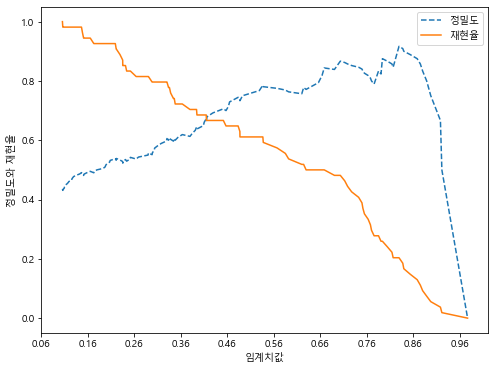

In [169]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    """
    threshold ndarray와 이 threslhold에 따른 정밀도, 재현율 추출 후 시각화 
    """
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율값으로 각각 plot수행
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: threshold_boundary], linestyle = '--', label = '정밀도')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = '재현율')
    
    start, end = plt.xlim() # 0 과 1을 X축, Y축 최소, 최대값을 갖는 눈금을 갖는 도형을 하나 그린다.
    
    # 그 위에 아래와 같은 눈금 및 라벨, 범례를 표시함.
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel("임계치값")
    plt.ylabel("정밀도와 재현율")
    plt.legend()
    plt.show()
    
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]    
precision_recall_curve_plot(y_test, pred_proba_c1)

* 재현율 곡선을 보면 임계값을 0.42정도로 하면 정밀도와 재현율이 균형을 이룰것으로 보이지만 재현률. 즉, 양성판정비율 및 정밀도 0.7이 안되는 수치에 머물러 있기때문에 임계치값을 조정하기 전에 데이터를 살펴보야 한다

### 당뇨병 데이터의 통계값

In [170]:
diabets_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

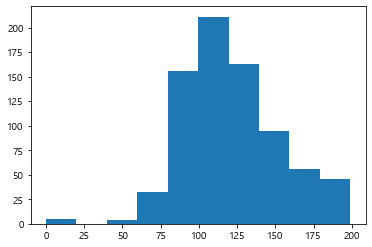

In [130]:
plt.hist(diabets_data.Glucose, bins = 10)

### min()값이 0인 것에 대한 어느정도의 비율인지를 확인하고 데이터프레임으로 확인

In [171]:
# `0`값을 검사할 리스트 
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
def get_zero_features_rate(zero_features):
    """
    0인 값이 있는 특성들을 리스트 타입으로 받아서 
    해당 특성들이 전체 갯수에서 차지하는 비율을 계산해
    데이터프레임으로 리턴
    """
    result = {}
    #전체 데이터 건수 
    total_count = diabets_data['Glucose'].count()
    
    # features로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 퍼센트 계산
    for zero_feature in zero_features:
        zero_count = diabets_data[diabets_data[zero_feature]== 0][zero_feature].count()
        percent = np.round(100 * zero_count / total_count, 2)
        result[zero_feature] = [zero_count, percent]
    result_df = pd.DataFrame(data = result.values(), index = result.keys(), columns = ['특성값_0갯수', '특성값_0_비율'])
    return result_df

get_zero_features_rate(zero_features)

,특성값_0갯수,특성값_0_비율
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0


### 특성의 값이 `0`인 것들이 많기 때문에 전처리 필요
* 삭제하면 데이터분석에 영향을 주므로 삭제보다는 평균값으로 대체하기로 결정

In [172]:
mean_zero_features = [diabets_data[zero_features].mean()]
mean_zero_features

[Glucose          121.681605
 BloodPressure     72.254807
 SkinThickness     26.606479
 Insulin          118.660163
 BMI               32.450805
 dtype: float64]

In [173]:
diabets_data[zero_features] = diabets_data[zero_features].replace(0, mean_zero_features)

TypeError: Invalid "to_replace" type: 'int'

In [174]:
diabets_data[zero_features]=diabets_data[zero_features].replace(0, diabets_data[zero_features].mean())

###  `0`값을 평균값으로 대체 후 피커 스케일링 적용
* 피처 스케일링 적용 후 학습데이터세트와 테스트 데이터 세트 분리
* 로지스틱 회귀 적용 후 학습평가 

In [175]:
X = diabets_data.iloc[:, :-1]
y = diabets_data.iloc[:, -1]


# StandardScaler클래스를 이용해 피처 데이터세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습, 예측, 평가 수행

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


{'정확도': 0.7987012987012987,
 '정밀도': 0.7674418604651163,
 '재현율': 0.6111111111111112,
 'F1': 0.6804123711340206,
 'ROC AUC': 0.8433333333333334}

* `데이터 변환` 과 `스케일링`을 통해 일정부분 평가지표가 성능이 개선됨을 알 수 있다.
* 하지만 `재현율` 수치는 개선이 필요해 보임. (암진단율 수치가 0.61밖에 되지않음)

### 분류 결정 임계값을 변환시키면서 재현율 값의 상승 수치 확인

In [176]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    result = {}
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        result[custom_threshold] = get_clf_eval(y_test , custom_predict, pred_proba_c1)
    return result

In [180]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
pd.DataFrame(get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds))

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,    F1: 0.6615, AUC:0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,    F1: 0.6774, AUC:0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,    F1: 0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,    F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,    F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,    F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


,0.30,0.33,0.36,0.39,0.42,0.45,0.48,0.50
정확도,0.714286,0.740260,0.746753,0.753247,0.779221,0.785714,0.798701,0.798701
정밀도,0.565789,0.600000,0.619048,0.633333,0.692308,0.705882,0.744681,0.767442
재현율,0.796296,0.777778,0.722222,0.703704,0.666667,0.666667,0.648148,0.611111
F1,0.661538,0.677419,0.666667,0.666667,0.679245,0.685714,0.693069,0.680412
ROC AUC,0.843333,0.843333,0.843333,0.843333,0.843333,0.843333,0.843333,0.843333


* 임계값 0.48이 전체적인 성능 평가를 유지하면서 재현율을 상승시키는 절충점이 되는 임계치 포인트이다.

### 임계치 0.48을 가지고 로지스틱 회귀모델 예측

In [184]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold = 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433


{'정확도': 0.7987012987012987,
 '정밀도': 0.7446808510638298,
 '재현율': 0.6481481481481481,
 'F1': 0.6930693069306931,
 'ROC AUC': 0.8433333333333334}

## 정리

* 이진 분류의 레이블 값이 불균형하게 분포될 경우, 단순히 예측결과와 실제 결과가 일치하는 지표인 정확도만으로는 머신러닝모델으리 예측성능을 평가할수
없습니다.
* 오차행렬은 Negative와 Positive값을 가지는 실제 클래스값과 예측 클래스값이 True와 False에 따라 TN,FP,FN.TP매핑되는 4분명 행렬을 기반으로 예측
성능을 평가
* 정밀도(Precision)와 재현율(Recall)은 Positive 데이터 세트의 예측 선능에 좀 더 초점을 맞춘 평가지표.
* F1 스코어는 정밀도와 재현율을 결합한 평가지표이며, 정밀도와 재현율이 어느 한쪽으로 치워치지 않을때 높은 지표값을 가지게됩니다.
* ROC-AUC 스코어는 일반적으로 이진분류의 성능 평가를 위해 가장 많이 사용되는 지표.
AUC값은 ROC곡선 밑의 면적을 구한것으로 일반적으로 1에 가까울수로고 좋은 수치입니다.